In [1]:
import shutil
import os
import pandas as pd
from ast import literal_eval
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# loading Receipt

In [2]:
fn = 'receipts.json.gz'
print(os.path.isfile(fn))
df_receipt = pd.read_json(fn, lines=True, compression='gzip')
df_receipt.tail()

True


,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
1114,{'$oid': '603cc0630a720fde100003e6'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614594147000},{'$date': 1614594147000},NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1118,{'$oid': '603c4fea0a7217c72c000389'},NaN,NaN,{'$date': 1614565354962},{'$date': 1614565354962},NaN,{'$date': 1614565354962},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33


In [3]:
df_receipt['rewardsReceiptItemList'][0]

[{'barcode': '4011',
  'description': 'ITEM NOT FOUND',
  'finalPrice': '26.00',
  'itemPrice': '26.00',
  'needsFetchReview': False,
  'partnerItemId': '1',
  'preventTargetGapPoints': True,
  'quantityPurchased': 5,
  'userFlaggedBarcode': '4011',
  'userFlaggedNewItem': True,
  'userFlaggedPrice': '26.00',
  'userFlaggedQuantity': 5}]

### Since 'rewardsReceiptItemList' is a list, we want to split this column into multiple columns, so we use explode function in pandas

In [4]:
df_receipt = df_receipt.explode('rewardsReceiptItemList')
df_receipt.reset_index(inplace=True)

In [5]:
df_receipt.head()

,index,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"{'barcode': '028400642255', 'description': 'DO...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
3,2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"{'needsFetchReview': False, 'partnerItemId': '...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
4,3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6


In [6]:
df_receipt = df_receipt.fillna({'rewardsReceiptItemList':'{}'})
df_receipt['rewardsReceiptItemList'] = df_receipt['rewardsReceiptItemList'].apply(lambda x:str(x))
df_receipt['rewardsReceiptItemList'] = df_receipt['rewardsReceiptItemList'].apply(literal_eval)

In [7]:
df_receipt_norm = pd.json_normalize(df_receipt['rewardsReceiptItemList'],errors='ignore',record_prefix='rewardsReceiptItemList')\
.add_prefix('rewardsReceiptItemList.')

In [8]:
df_receipt2=pd.merge(df_receipt, df_receipt_norm, left_index=True, right_index=True, how='outer')

In [9]:
df_receipt2.head(15)

,index,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,...,rewardsReceiptItemList.itemNumber,rewardsReceiptItemList.originalMetaBriteQuantityPurchased,rewardsReceiptItemList.pointsEarned,rewardsReceiptItemList.targetPrice,rewardsReceiptItemList.competitiveProduct,rewardsReceiptItemList.originalFinalPrice,rewardsReceiptItemList.originalMetaBriteItemPrice,rewardsReceiptItemList.deleted,rewardsReceiptItemList.priceAfterCoupon,rewardsReceiptItemList.metabriteCampaignId
0,0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,{'$oid': '5ff1e1e40a7214ada1000566'},750.0,"Receipt number 1 completed, bonus point schedu...",{'$date': 1609687524000},{'$date': 1609687524000},{'$date': 1609687525000},{'$date': 1609687530000},{'$date': 1609687525000},750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,{'$oid': '5ff1e1cd0a720f052300056f'},5.0,All-receipts receipt bonus,{'$date': 1609687501000},{'$date': 1609687501000},{'$date': 1609687502000},{'$date': 1609687502000},{'$date': 1609687502000},5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,{'$oid': '5ff1e1a40a720f0523000569'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687460000},{'$date': 1609687460000},{'$date': 1609687461000},{'$date': 1609687461000},{'$date': 1609687461000},500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_receipt2['rewardsReceiptStatus'].unique()

array(['FINISHED', 'REJECTED', 'FLAGGED', 'SUBMITTED', 'PENDING'],
      dtype=object)

### Adjusting date format and other columns format (some containg $signs)

In [12]:
def adjust_date(x):
  try:
    return datetime.utcfromtimestamp(int(x['$date'])/1000).strftime('%Y-%m-%d %H:%M:%S')
  except TypeError:
    return None

In [13]:
df_receipt2['_id'] = df_receipt2['_id'].apply(lambda x: x['$oid'])
df_receipt2['createDate'] = df_receipt2['createDate'].apply(lambda x: adjust_date(x))
df_receipt2['dateScanned'] = df_receipt2['dateScanned'].apply(lambda x: adjust_date(x))
df_receipt2['finishedDate'] = df_receipt2['finishedDate'].apply(lambda x: adjust_date(x))
df_receipt2['modifyDate'] = df_receipt2['modifyDate'].apply(lambda x: adjust_date(x))
df_receipt2['pointsAwardedDate'] = df_receipt2['pointsAwardedDate'].apply(lambda x: adjust_date(x))
df_receipt2['purchaseDate'] = df_receipt2['purchaseDate'].apply(lambda x: adjust_date(x))

In [14]:
df_receipt2

,index,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,...,rewardsReceiptItemList.itemNumber,rewardsReceiptItemList.originalMetaBriteQuantityPurchased,rewardsReceiptItemList.pointsEarned,rewardsReceiptItemList.targetPrice,rewardsReceiptItemList.competitiveProduct,rewardsReceiptItemList.originalFinalPrice,rewardsReceiptItemList.originalMetaBriteItemPrice,rewardsReceiptItemList.deleted,rewardsReceiptItemList.priceAfterCoupon,rewardsReceiptItemList.metabriteCampaignId
0,0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,None,2021-01-03 15:25:42,None,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,1115,603d0b710a720fde1000042a,NaN,NaN,2021-03-01 15:42:41,2021-03-01 15:42:41,None,2021-03-01 15:42:41,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7377,1116,603cf5290a720fde10000413,NaN,NaN,2021-03-01 14:07:37,2021-03-01 14:07:37,None,2021-03-01 14:07:37,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7378,1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 13:07:28,2021-03-01 13:07:28,None,2021-03-01 13:07:29,None,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN
7379,1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 13:07:28,2021-03-01 13:07:28,None,2021-03-01 13:07:29,None,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN


In [15]:
#renaming "_id" to "UserId"
df_receipt2=df_receipt2.rename(columns = {'_id':'ReceiptId'})

In [16]:
df_receipt2.head()

,index,ReceiptId,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,...,rewardsReceiptItemList.itemNumber,rewardsReceiptItemList.originalMetaBriteQuantityPurchased,rewardsReceiptItemList.pointsEarned,rewardsReceiptItemList.targetPrice,rewardsReceiptItemList.competitiveProduct,rewardsReceiptItemList.originalFinalPrice,rewardsReceiptItemList.originalMetaBriteItemPrice,rewardsReceiptItemList.deleted,rewardsReceiptItemList.priceAfterCoupon,rewardsReceiptItemList.metabriteCampaignId
0,0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,None,2021-01-03 15:25:42,None,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Now we separate the rewardsReceiptItemList to createa a new dataframe 

In [17]:
receipt_columns=[ 
         'rewardsReceiptItemList.barcode',
       'rewardsReceiptItemList.description',
       'rewardsReceiptItemList.finalPrice', 'rewardsReceiptItemList.itemPrice',
       'rewardsReceiptItemList.needsFetchReview',
       'rewardsReceiptItemList.partnerItemId',
       'rewardsReceiptItemList.preventTargetGapPoints',
       'rewardsReceiptItemList.quantityPurchased',
       'rewardsReceiptItemList.userFlaggedBarcode',
       'rewardsReceiptItemList.userFlaggedNewItem',
       'rewardsReceiptItemList.userFlaggedPrice',
       'rewardsReceiptItemList.userFlaggedQuantity',
       'rewardsReceiptItemList.needsFetchReviewReason',
       'rewardsReceiptItemList.pointsNotAwardedReason','rewardsReceiptItemList.pointsPayerId',
       'rewardsReceiptItemList.rewardsGroup',
       'rewardsReceiptItemList.rewardsProductPartnerId',
       'rewardsReceiptItemList.userFlaggedDescription',
       'rewardsReceiptItemList.originalMetaBriteBarcode',
       'rewardsReceiptItemList.originalMetaBriteDescription',
       'rewardsReceiptItemList.brandCode',
       'rewardsReceiptItemList.competitorRewardsGroup',
       'rewardsReceiptItemList.discountedItemPrice',
       'rewardsReceiptItemList.originalReceiptItemText',
       'rewardsReceiptItemList.itemNumber',
       'rewardsReceiptItemList.originalMetaBriteQuantityPurchased',
       'rewardsReceiptItemList.pointsEarned',
       'rewardsReceiptItemList.targetPrice',
       'rewardsReceiptItemList.competitiveProduct',
       'rewardsReceiptItemList.originalFinalPrice',
       'rewardsReceiptItemList.originalMetaBriteItemPrice',
       'rewardsReceiptItemList.deleted',
       'rewardsReceiptItemList.priceAfterCoupon',
       'rewardsReceiptItemList.metabriteCampaignId']
df_receipt_items=df_receipt2[receipt_columns]

In [18]:
df_receipt_items.head()

,rewardsReceiptItemList.barcode,rewardsReceiptItemList.description,rewardsReceiptItemList.finalPrice,rewardsReceiptItemList.itemPrice,rewardsReceiptItemList.needsFetchReview,rewardsReceiptItemList.partnerItemId,rewardsReceiptItemList.preventTargetGapPoints,rewardsReceiptItemList.quantityPurchased,rewardsReceiptItemList.userFlaggedBarcode,rewardsReceiptItemList.userFlaggedNewItem,...,rewardsReceiptItemList.itemNumber,rewardsReceiptItemList.originalMetaBriteQuantityPurchased,rewardsReceiptItemList.pointsEarned,rewardsReceiptItemList.targetPrice,rewardsReceiptItemList.competitiveProduct,rewardsReceiptItemList.originalFinalPrice,rewardsReceiptItemList.originalMetaBriteItemPrice,rewardsReceiptItemList.deleted,rewardsReceiptItemList.priceAfterCoupon,rewardsReceiptItemList.metabriteCampaignId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#this is done to remove the 'rewardsReceiptItemList' from the column names for the new dataframe (df_receipt_items)
for i,j in enumerate(df_receipt_items.columns):
    first,second=j.split('.')
    df_receipt_items.rename({df_receipt_items.columns[i]:second},inplace=True, axis=1)


C:\Users\mohammed\AppData\Local\Temp\ipykernel_130984\483380906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_receipt_items.rename({df_receipt_items.columns[i]:second},inplace=True, axis=1)


In [20]:
receipt_columns.append('rewardsReceiptItemList') #add 'rewardsReceiptItemList'column to the column list so that we drop these columns from the receipt dataframe
df_receipt2.drop(receipt_columns, axis = 1, inplace = True) 

In [21]:
receipt_columns

['rewardsReceiptItemList.barcode',
 'rewardsReceiptItemList.description',
 'rewardsReceiptItemList.finalPrice',
 'rewardsReceiptItemList.itemPrice',
 'rewardsReceiptItemList.needsFetchReview',
 'rewardsReceiptItemList.partnerItemId',
 'rewardsReceiptItemList.preventTargetGapPoints',
 'rewardsReceiptItemList.quantityPurchased',
 'rewardsReceiptItemList.userFlaggedBarcode',
 'rewardsReceiptItemList.userFlaggedNewItem',
 'rewardsReceiptItemList.userFlaggedPrice',
 'rewardsReceiptItemList.userFlaggedQuantity',
 'rewardsReceiptItemList.needsFetchReviewReason',
 'rewardsReceiptItemList.pointsNotAwardedReason',
 'rewardsReceiptItemList.pointsPayerId',
 'rewardsReceiptItemList.rewardsGroup',
 'rewardsReceiptItemList.rewardsProductPartnerId',
 'rewardsReceiptItemList.userFlaggedDescription',
 'rewardsReceiptItemList.originalMetaBriteBarcode',
 'rewardsReceiptItemList.originalMetaBriteDescription',
 'rewardsReceiptItemList.brandCode',
 'rewardsReceiptItemList.competitorRewardsGroup',
 'rewardsRe

In [22]:
df_receipt2.head()

,index,ReceiptId,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
0,0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
3,2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,None,2021-01-03 15:25:42,None,5.0,2021-01-03 00:00:00,1.0,REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
4,3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,FINISHED,28.0,5ff1e1eacfcf6c399c274ae6


In [23]:
df_receipt2.to_csv('receipts.csv')

In [24]:
df_receipt_items=pd.concat([df_receipt2['ReceiptId'],df_receipt_items],axis=1)
df_receipt_items.head()

,ReceiptId,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,5ff1e1eb0a720f0523000575,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff1e1bb0a720f052300056b,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ff1e1bb0a720f052300056b,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ff1e1f10a720f052300057a,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ff1e1ee0a7214ada100056f,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_receipt_items.to_csv('receipt_items.csv')

# loading Brands

In [26]:
import pandas as pd
import os
fn3 = 'brands.json.gz'
print(os.path.isfile(fn3))
df_brands = pd.read_json(fn3, lines=True, compression='gzip')
df_brands.tail()

True


,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
1162,{'$oid': '5f77274dbe37ce6b592e90c0'},511111116752,Baking,BAKING,"{'$ref': 'Cogs', '$id': {'$oid': '5f77274dbe37...",test brand @1601644365844,NaN,NaN
1163,{'$oid': '5dc1fca91dda2c0ad7da64ae'},511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL
1164,{'$oid': '5f494c6e04db711dd8fe87e7'},511111416173,Candy & Sweets,CANDY_AND_SWEETS,"{'$ref': 'Cogs', '$id': {'$oid': '5332fa12e4b0...",test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217
1165,{'$oid': '5a021611e4b00efe02b02a57'},511111400608,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5f6e4b0...",LIPTON TEA Leaves,0.0,LIPTON TEA Leaves
1166,{'$oid': '6026d757be37ce6369301468'},511111019930,Baking,BAKING,"{'$id': {'$oid': '6026d757be37ce6369301467'}, ...",test brand @1613158231643,0.0,TEST BRANDCODE @1613158231644


In [27]:
## the CPG field is a dictionary, so we can use the explode function again to divide it into multiple columns
brands_norm = pd.json_normalize(df_brands['cpg'])
brands_norm = brands_norm.add_prefix('cpg.')

In [28]:
df_brands2 = pd.merge(df_brands, brands_norm, left_index=True, right_index=True, how='outer')
df_brands2.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode,cpg.$ref,cpg.$id.$oid
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN,Cogs,601ac114be37ce2ead437550
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7


##### The _id is a dictionary, so we will remove the '$oid' part

In [29]:
df_brands2['_id'] = df_brands2['_id'].apply(lambda x: x['$oid'])
df_brands2.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode,cpg.$ref,cpg.$id.$oid
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN,Cogs,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7


In [30]:
df_brands2['cpg.ref']=df_brands2['cpg.$ref']
df_brands2['cpg.id.oid']=df_brands2['cpg.$id.$oid']

In [31]:
df_brands2.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode,cpg.$ref,cpg.$id.$oid,cpg.ref,cpg.id.oid
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN,Cogs,601ac114be37ce2ead437550,Cogs,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba,Cogs,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559,Cogs,601ac142be37ce2ead437559
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559,Cogs,601ac142be37ce2ead437559
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7,Cogs,5332fa12e4b03c9a25efd1e7


##### Now we remove the old columns with '$' in their names

In [32]:
df_brands2= df_brands2.drop(['cpg','cpg.$id.$oid','cpg.$ref'], axis=1)
df_brands2.head()

,_id,barcode,category,categoryCode,name,topBrand,brandCode,cpg.ref,cpg.id.oid
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,test brand @1612366101024,0.0,NaN,Cogs,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7


# now we separate CPG into a separate dataframe

In [33]:
#renaming columns
df_brands2 = df_brands2.rename(columns={'_id':'brand_id',
    'cpg.id.oid': 'id',
                                     'cpg.ref': 'ref'   })

In [34]:
df_brands2.head()

,brand_id,barcode,category,categoryCode,name,topBrand,brandCode,ref,id
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,test brand @1612366101024,0.0,NaN,Cogs,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7


In [35]:
df_cpg=df_brands2[['ref','id']]
df_cpg.head()

,ref,id
0,Cogs,601ac114be37ce2ead437550
1,Cogs,5332f5fbe4b03c9a25efd0ba
2,Cogs,601ac142be37ce2ead437559
3,Cogs,601ac142be37ce2ead437559
4,Cogs,5332fa12e4b03c9a25efd1e7


In [36]:
df_brands2.drop(['ref','id'], axis = 1, inplace = True) 
df_brands2.head()

,brand_id,barcode,category,categoryCode,name,topBrand,brandCode
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,test brand @1612366101024,0.0,NaN
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [37]:
df_brands2.to_csv('brands.csv')

In [38]:
df_cpg.to_csv('cpg.csv')

# loading Users

In [39]:

fn2 = 'users.json.gz'
print(os.path.isfile(fn2))
df_users = pd.read_json(fn2, lines=True, compression='tar')
df_users.tail()

True


,_id,active,createdDate,lastLogin,role,signUpSource,state
490,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
491,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
492,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
493,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
494,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN


In [40]:
df_users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [41]:
df_users['createdDate'] = df_users['createdDate'].apply(lambda x: adjust_date(x))
df_users['_id'] = df_users['_id'].apply(lambda x: x['$oid'])
df_users['lastLogin'] = df_users['lastLogin'].apply(lambda x: adjust_date(x))

In [42]:
df_users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30,2021-01-03 15:25:30,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI


In [43]:
#renaming "_id" to "UserId"
df_users=df_users.rename(columns = {'_id':'UserId'})

In [44]:
df_users.head()

,UserId,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30,2021-01-03 15:25:30,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI


In [45]:
df_users.to_csv('users.csv')

# data issues: 
##### 1) the number of unique brands in the brands dataframe is signifantly higher than the one in the receipt dataframe

In [46]:

len(df_brands2['brandCode'].unique())

898

In [47]:
len(df_receipt_items['brandCode'].unique())

228

##### 2) Null Values Analysis: notice how some of the columns in each table contain many 'Nan' Values

In [48]:
#brand_id is the primary key, it does not contain null values which is good, as prime keys need to be not null and unique
df_brands2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand_id      1167 non-null   object 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   name          1167 non-null   object 
 5   topBrand      555 non-null    float64
 6   brandCode     933 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 63.9+ KB


In [49]:
df_brands2.isnull().sum()

brand_id          0
barcode           0
category        155
categoryCode    650
name              0
topBrand        612
brandCode       234
dtype: int64

In [50]:
#ReceiptId is the primary key, it does not contain null values which is good, as prime keys need to be not null and unique
df_receipt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    7381 non-null   int64  
 1   ReceiptId                7381 non-null   object 
 2   bonusPointsEarned        5980 non-null   float64
 3   bonusPointsEarnedReason  5980 non-null   object 
 4   createDate               7381 non-null   object 
 5   dateScanned              7381 non-null   object 
 6   finishedDate             5970 non-null   object 
 7   modifyDate               7381 non-null   object 
 8   pointsAwardedDate        6080 non-null   object 
 9   pointsEarned             6253 non-null   float64
 10  purchaseDate             6923 non-null   object 
 11  purchasedItemCount       6897 non-null   float64
 12  rewardsReceiptStatus     7381 non-null   object 
 13  totalSpent               6946 non-null   float64
 14  userId                  

In [51]:
df_receipt2.isnull().sum()

index                         0
ReceiptId                     0
bonusPointsEarned          1401
bonusPointsEarnedReason    1401
createDate                    0
dateScanned                   0
finishedDate               1411
modifyDate                    0
pointsAwardedDate          1301
pointsEarned               1128
purchaseDate                458
purchasedItemCount          484
rewardsReceiptStatus          0
totalSpent                  435
userId                        0
dtype: int64

In [52]:
#UserId is the primary key, it does not contain null values which is good, as prime keys need to be not null and unique
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserId        495 non-null    object
 1   active        495 non-null    bool  
 2   createdDate   495 non-null    object
 3   lastLogin     433 non-null    object
 4   role          495 non-null    object
 5   signUpSource  447 non-null    object
 6   state         439 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


In [53]:
df_users.isnull().sum()

UserId           0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64

In [54]:
#id for cpg is the primary key, it does not contain null values which is good, as prime keys need to be not null and unique
df_cpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ref     1167 non-null   object
 1   id      1167 non-null   object
dtypes: object(2)
memory usage: 18.4+ KB


In [55]:
df_cpg.isnull().sum()

ref    0
id     0
dtype: int64

In [56]:
#general check
df_receipt_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ReceiptId                           7381 non-null   object 
 1   barcode                             3090 non-null   object 
 2   description                         6560 non-null   object 
 3   finalPrice                          6767 non-null   object 
 4   itemPrice                           6767 non-null   object 
 5   needsFetchReview                    813 non-null    object 
 6   partnerItemId                       6941 non-null   object 
 7   preventTargetGapPoints              358 non-null    object 
 8   quantityPurchased                   6767 non-null   float64
 9   userFlaggedBarcode                  337 non-null    object 
 10  userFlaggedNewItem                  323 non-null    object 
 11  userFlaggedPrice                    299 non

In [57]:
df_receipt_items.isnull().sum()

ReceiptId                                0
barcode                               4291
description                            821
finalPrice                             614
itemPrice                              614
needsFetchReview                      6568
partnerItemId                          440
preventTargetGapPoints                7023
quantityPurchased                      614
userFlaggedBarcode                    7044
userFlaggedNewItem                    7058
userFlaggedPrice                      7082
userFlaggedQuantity                   7082
needsFetchReviewReason                7162
pointsNotAwardedReason                7041
pointsPayerId                         6114
rewardsGroup                          5650
rewardsProductPartnerId               5112
userFlaggedDescription                7176
originalMetaBriteBarcode              7310
originalMetaBriteDescription          7371
brandCode                             4781
competitorRewardsGroup                7106
discountedI

In [58]:
#itemNumber for receipt_items is the primary key, it does contain many null values which is not good, as prime keys need to be not null and unique
df_receipt_items['itemNumber'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7381 entries, 0 to 7380
Series name: itemNumber
Non-Null Count  Dtype 
--------------  ----- 
153 non-null    object
dtypes: object(1)
memory usage: 57.8+ KB


In [59]:
df_receipt_items['itemNumber'].isnull().sum()

7228

#### 3) Checking for duplicates: some of the tables contain a high percentage of duplicate records, below is a summary of findings:
1) for the brands dataframe: brand_id is the primary key, it does not contain null values which is good, as prime keys need to be not null and unique, and has 0% duplicates, which is a good sign.

2) for the receipts dataframe: ReceiptId is the primary key, it does not contain null values which is good, as prime keys need to be not null and unique, but it has 84% duplicates, which means that the values are not unique, and that is considered a problematic for a prime key

3) for the users dataframe: UserId is the primary key, it does not contain null values which is good, as prime keys need to be not null and unique, but it has 57% duplicates, which means that the values are not unique, and that is considered a problematic for a prime key


4) for the cpg dataframe: id for cpg is the primary key, it does not contain null values which is good, as prime keys need to be not null and unique, but it has 83% duplicates, which means that the values are not unique, and that is considered a problematic for a prime key

5) for the receipt_items dataframe: itemNumber for receipt_items is the primary key, it does contain many null values which is not good, as prime keys need to be not null and unique, but it has 99% duplicates, which means that the values are not unique, and that is considered a problematic for a prime key

In [60]:
# to get the total number of rows in the users database
num_users=len(df_users)
num_users

495

In [61]:
#the number of duplicate records
num_dup_users=df_users['UserId'].duplicated().sum()
num_dup_users

283

In [62]:
#percentage of duplicates
print("percentage of duplicates in users: {0:.2f}".format((num_dup_users/num_users)*100))

percentage of duplicates in users: 57.17


#### this is an issue because the id is considered the prime key, which has the requirements of being a unique, and non null: the uniqueness is not satisfied here which is an issue

In [63]:
# to get the total number of rows in the receipts database
num_rec=len(df_receipt2)
num_rec

7381

In [64]:
#the number of duplicates in receipts
num_dup_rec=df_receipt2['ReceiptId'].duplicated().sum()
num_dup_rec

6262

In [65]:
#percentage of duplicates
print("percentage of duplicates in receipts: {0:.2f}".format((num_dup_rec/num_rec)*100))

percentage of duplicates in receipts: 84.84


In [66]:
# to get the total number of rows in the receipts database
num_brands=len(df_brands2)
num_brands

1167

In [67]:
#the number of duplicates in receipts
num_dup_brands=df_brands2['brand_id'].duplicated().sum()
num_dup_brands

0

In [68]:
#percentage of duplicates
print("percentage of duplicates in brands: {0:.2f}".format((num_dup_brands/num_brands)*100))

percentage of duplicates in brands: 0.00


In [69]:
# to get the total number of rows in the cpg database
num_cpg=len(df_cpg)
num_cpg

1167

In [70]:
#the number of duplicate records
num_dup_cpg=df_cpg['id'].duplicated().sum()
num_dup_cpg

971

In [71]:
#percentage of duplicates
print("percentage of duplicates in users: {0:.2f}".format((num_dup_cpg/num_cpg)*100))

percentage of duplicates in users: 83.20


In [72]:
# to get the total number of rows in the cpg database
num_receipt_items=len(df_receipt_items)
num_receipt_items

7381

In [73]:
#the number of duplicate records
num_dup_receipt_items=df_receipt_items['itemNumber'].duplicated().sum()
num_dup_receipt_items

7333

In [74]:
#percentage of duplicates
print("percentage of duplicates in users: {0:.2f}".format((num_dup_receipt_items/num_receipt_items)*100))

percentage of duplicates in users: 99.35


#### plotting correlation between features in Receipt: there is a high correlation between totalspent, pointsearned and purchaseditemcount.
there is also very high correlation between rewardsReceiptItemList.userFlaggedQuantity	 and rewardsReceiptItemList.originalMetaBriteQuantityPurchased

In [75]:
df_receipt2_numerical = df_receipt2.select_dtypes(exclude='object')
df_receipt2_numerical

,index,bonusPointsEarned,pointsEarned,purchasedItemCount,totalSpent
0,0,500.0,500.0,5.0,26.00
1,1,150.0,150.0,2.0,11.00
2,1,150.0,150.0,2.0,11.00
3,2,5.0,5.0,1.0,10.00
4,3,5.0,5.0,4.0,28.00
...,...,...,...,...,...
7376,1115,NaN,NaN,NaN,NaN
7377,1116,NaN,NaN,NaN,NaN
7378,1117,25.0,25.0,2.0,34.96
7379,1117,25.0,25.0,2.0,34.96


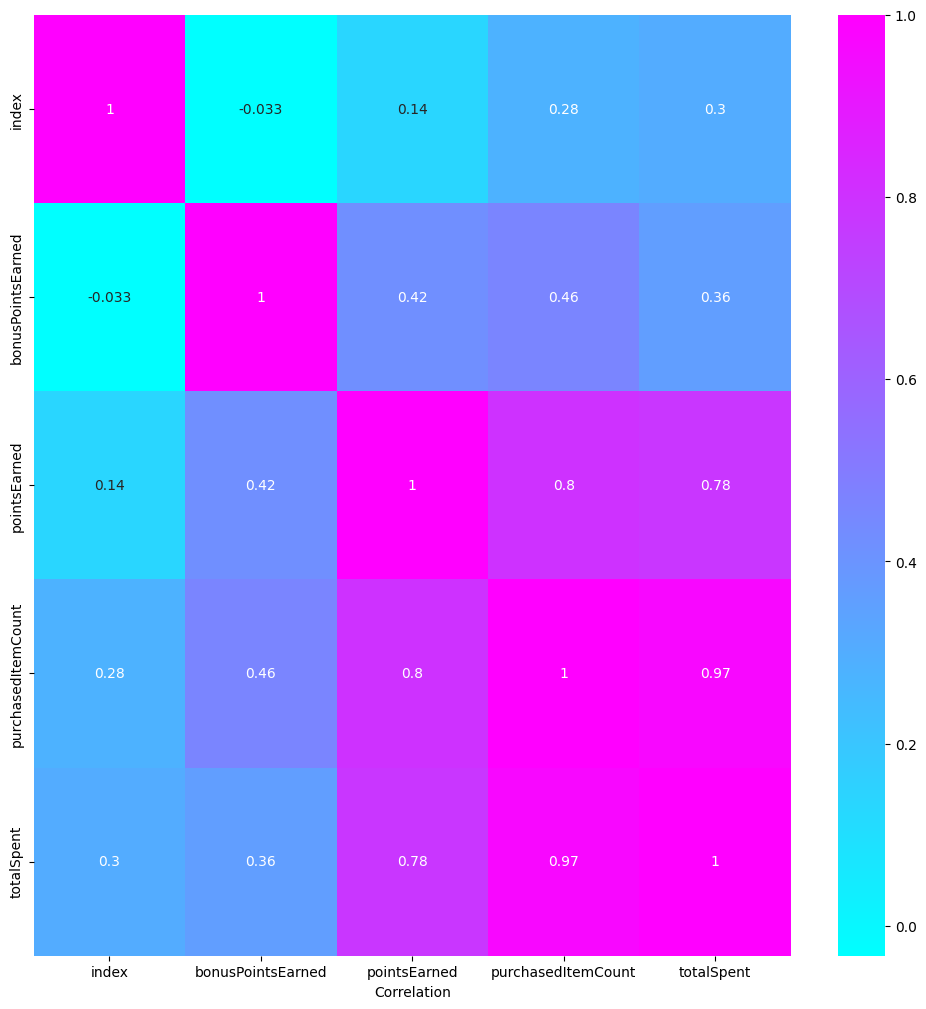

In [76]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(df_receipt2_numerical.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Correlation')
plt.show()

In [77]:
df_receipt_items_numerical = df_receipt_items.select_dtypes(exclude='object')
df_receipt_items_numerical

,quantityPurchased,userFlaggedQuantity,originalMetaBriteQuantityPurchased
0,5.0,5.0,NaN
1,1.0,NaN,NaN
2,1.0,1.0,NaN
3,NaN,3.0,NaN
4,4.0,4.0,NaN
...,...,...,...
7376,NaN,NaN,NaN
7377,NaN,NaN,NaN
7378,1.0,NaN,NaN
7379,1.0,NaN,NaN


### plotting correlation between receipt items numerical columns

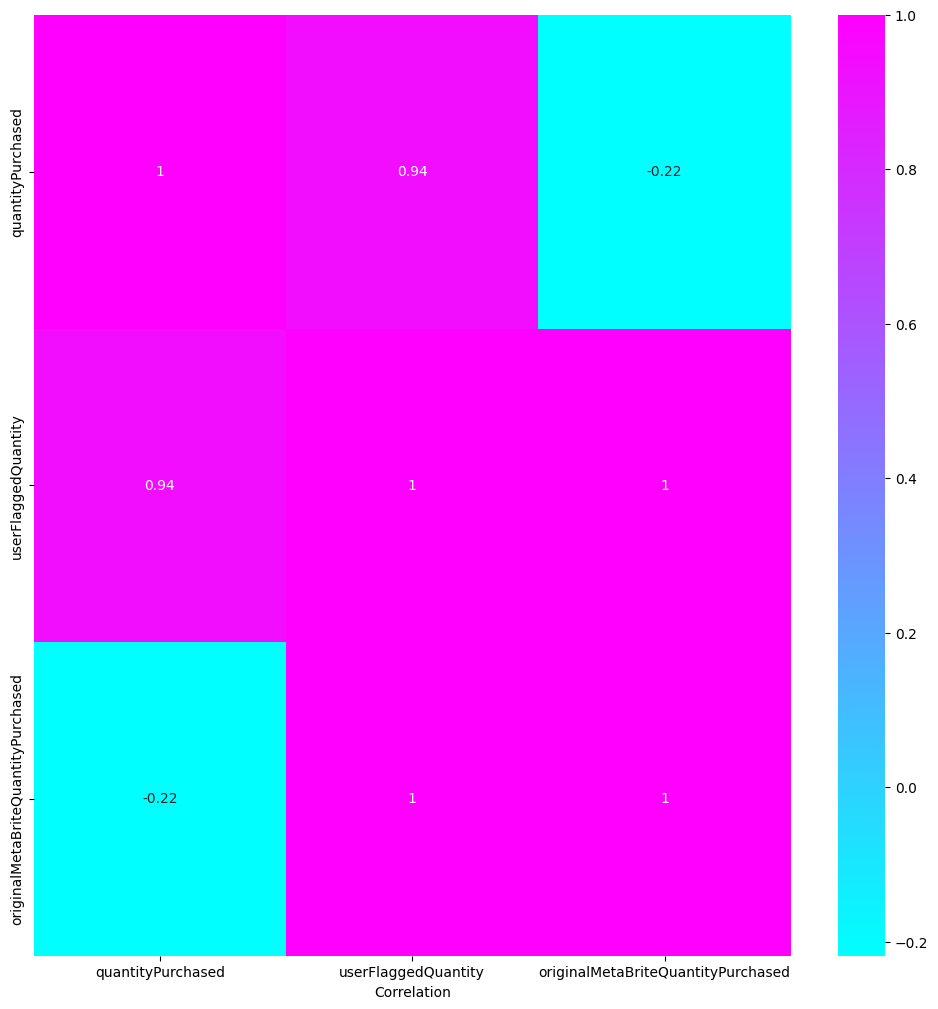

In [78]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(df_receipt_items_numerical.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Correlation')
plt.show()

#### Did not do the same for the other 2 tables, as they did not have continous variables as in the receipts table.

In [79]:
df_brands2_numerical = df_brands2.select_dtypes(exclude='object')
df_brands2_numerical

,barcode,topBrand
0,511111019862,0.0
1,511111519928,0.0
2,511111819905,0.0
3,511111519874,0.0
4,511111319917,0.0
...,...,...
1162,511111116752,NaN
1163,511111706328,NaN
1164,511111416173,NaN
1165,511111400608,0.0


In [80]:
df_users_numerical = df_users.select_dtypes(exclude='object')
df_users_numerical

,active
0,True
1,True
2,True
3,True
4,True
...,...
490,True
491,True
492,True
493,True


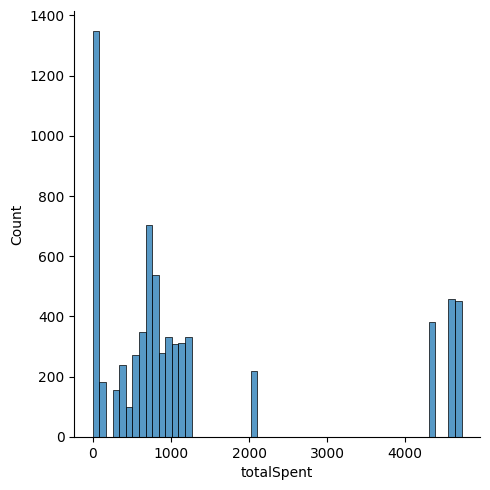

In [81]:
#We can plot the distribution, and we can perform further analysis to check for anomalies or outliers: if the goal to use a machine learning model, then it might be considered essential to remove outliers, as some algorithms are sensitive for outliers
sns.displot(df_receipt2_numerical['totalSpent'])